Test cloud sensor on allsky images.

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

In [3]:
allsky_image = os.path.expanduser('~/AllSkyImage000085049.FIT')
print allsky_image
hdu = fits.open(allsky_image)
hdu.info()
print hdu[0].header

/Users/tiago/AllSkyImage000085049.FIT
Filename: /Users/tiago/AllSkyImage000085049.FIT
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      12   (640, 480)   int16 (rescales to uint16)   
SIMPLE  =                    T                                                  BITPIX  =                   16                                                  NAXIS   =                    2                                                  NAXIS1  =                  640                                                  NAXIS2  =                  480                                                  INSTRUME= 'SBIG AllSky-340'                                                     DATE-OBS= '2017-01-06T14:28:09.922'                                             BSCALE  = +1.000000000000E+000                                                  BZERO   = +3.276800000000E+004                                                  EXPTIME = +1.000000000000E-004                         

In [4]:
#g = hdu[0].data[slice(0,-1,2),slice(0,-1,2)]

mask_r = np.zeros((480,640)) == 0
for i in range(len(mask_r)):
    mask_r[i] = (-1*((i+1)%2))**np.arange(len(mask_r[i])) == -1

mask_g = np.zeros((480,640)) == 0
for i in range(len(mask_g)):
    mask_g[i] = (-1+np.zeros_like(mask_g[i]))**(i+np.arange(len(mask_g[i]))) == -1

mask_b = np.zeros((480,640)) == 0
for i in range(len(mask_b)):
    mask_b[i] = (-1*(i%2))**np.arange(len(mask_b[i])) == -1

In [5]:
import pyds9 as ds9

d = ds9.ds9()

#d.set_np2arr(np.array(mask_g),dtype=np.int)
print hdu[0].data.shape, mask_g.shape, mask_g[mask_g].shape
g = hdu[0].data[mask_g].reshape(240,640)
g1 = g[::,:320:]
g2 = g[::,320::]
g=np.mean([g1,g2], axis = 0)
d.set_np2arr(g)

(480, 640) (480, 640) (153600,)


/Users/tiago/anaconda/lib/python2.7/site-packages/pyds9.py:745: UserWarning: The class name "ds9" is deprecated.  In the future, use "DS9" instead.
  warn('The class name "ds9" is deprecated.  In the future, use "DS9" '


1

In [13]:
r = hdu[0].data[mask_r].reshape(240,320)
d.set_np2arr(r)

1

In [14]:
b = hdu[0].data[mask_b].reshape(240,320)
d.set_np2arr(b)

1

[[ 1.02851978  1.00863061  0.96461014 ...,  0.93178037  0.95284553
   1.09174312]
 [ 1.03139357  1.0319986   1.00283617 ...,  1.1097561   0.94049587
   1.11759582]
 [ 1.07145359  1.04595186  1.09452736 ...,  0.98893617  0.95550162
   1.08508692]
 ..., 
 [ 0.88379951  0.91398026  0.96699826 ...,  1.12304251  0.9646539
   1.04027356]
 [ 0.85573207  0.89144858  0.88353353 ...,  0.96664301  0.88172043
   0.97771174]
 [ 0.89902125  0.90770197  0.94259326 ...,  0.94109195  0.92422096
   0.9859944 ]]


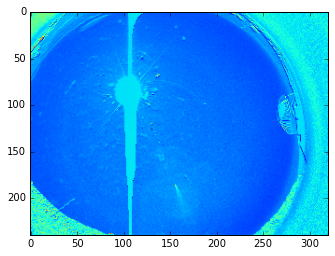

In [15]:
br = np.array(b,dtype=np.float)/r
print br
#d.set_np2arr(br)
plt.imshow(br)

In [71]:
d.set_np2arr(hdu[0].data)

1

In [8]:
np.max(hdu[0].data)

47761

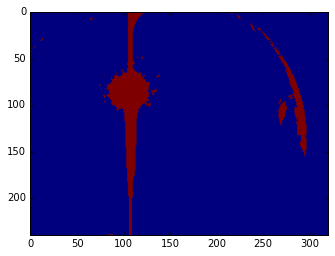

In [16]:
mask = g >30000
plt.imshow(mask)

In [18]:
a = np.load(os.path.expanduser('~/foo.npy'))
print a

[ (57772.98793056713, 0.03650004782504766, 0.10169606894225236, 'AllSkyCurrentImage.FIT')
 (57731.067927013886, 0.024659996788064027, 0.05302216348106527, 'AllSkyImage000078463.FIT')
 (57759.60289261574, 0.04831794374175043, 0.11250786131870241, 'AllSkyImage000085049.FIT')
 (57772.16136253472, 0.011970092868325963, 0.023376663868190154, 'AllSkyImage000086856.FIT')]


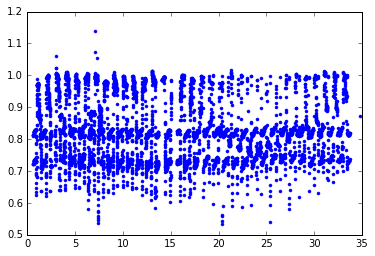

In [48]:
stats = np.load(os.path.expanduser('~/Documents/allSkyCloudDetection/img1000.npy'))
for i in range(2,7):
    stats = np.append(stats,
                      np.load(os.path.expanduser('~/Documents/allSkyCloudDetection/img%i000.npy'%i)))

mjd0 = np.floor(np.min(stats['mjd']))
phase = stats['mjd']-mjd0

plt.plot(phase,stats['mean'],'.')

<Container object of 3 artists>

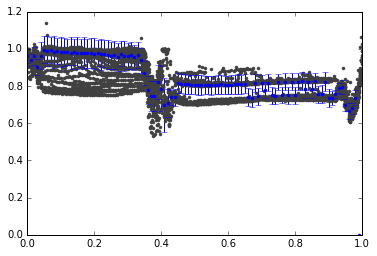

In [49]:
phase -= np.floor(phase)
phase_bins = np.arange(0,1,0.01)

mean_mean = np.zeros_like(phase_bins)
mean_std = np.zeros_like(phase_bins)
std_mean = np.zeros_like(phase_bins)
for i in range(len(phase_bins)-1):
    mask = np.bitwise_and(np.bitwise_and(phase > phase_bins[i], phase < phase_bins[i + 1]), 
                          np.bitwise_not(np.isnan(stats['mean'])))
    mean_mean[i] = np.median(stats['mean'][mask])
    mean_std[i] = np.median(stats['std'][mask])
    std_mean[i] = np.std(stats['mean'][mask])

plt.plot(phase,stats['mean'],'.',color='0.25')
plt.errorbar(phase_bins, mean_mean, std_mean, fmt='.')

In [8]:
for i in range(len(phase_bins)-1):
    mask = np.bitwise_and(np.bitwise_and(phase > phase_bins[i], phase < phase_bins[i + 1]), 
                          np.bitwise_not(np.isnan(stats['mean'])))
    index_worst = np.argmax(stats['mean'][mask])
    index_best = np.argmin(stats['mean'][mask])
    #print stats['filename'][mask][index_best]
    #print stats[mask][index_worst] 
    #print np.max(stats['mean'][mask])
# print mjd0

In [10]:
for i in range(len(phase)):
    if phase[i+1] < phase[i]:
        print i
        break
    

108


In [12]:
phase[108],phase[109]

(0.99950086805620231, 0.0029738310186075978)

In [17]:
stats[109]

(57742.00297383102, 0.0215579248039561, 0.07845404650360671, 'AllSkyImage000080555.FIT')

In [18]:
for i in range(109,len(phase)):
    if phase[i+1] < phase[i]:
        print i
        break
    

396


In [19]:
stats[396]

(57742.99991670139, 0.022251653258546316, 0.07698009248922555, 'AllSkyImage000080842.FIT')

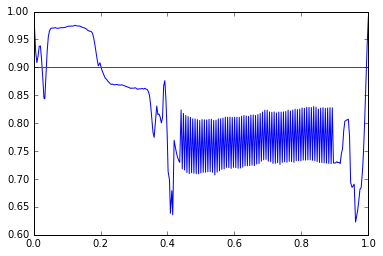

In [67]:
arr = np.arange(109,397)
plt.plot(phase[arr],stats['mean'][arr],'-')
plt.plot([0.,1.],[0.9,0.9],'r-')


In [22]:
for i in range(109,397):
    print stats['filename'][i], stats['mean'][i]

AllSkyImage000080555.FIT 0.021557924804
AllSkyImage000080556.FIT 0.0174488156418
AllSkyImage000080557.FIT 0.0177878533932
AllSkyImage000080558.FIT 0.0191403866826
AllSkyImage000080559.FIT 0.0199376013169
AllSkyImage000080560.FIT 0.0202317460603
AllSkyImage000080561.FIT 0.0209292328706
AllSkyImage000080562.FIT 0.0215844963206
AllSkyImage000080563.FIT 0.0226813380878
AllSkyImage000080564.FIT 0.0217635577439
AllSkyImage000080565.FIT 0.0197346472175
AllSkyImage000080566.FIT 0.0168978808122
AllSkyImage000080567.FIT 0.0184927406565
AllSkyImage000080568.FIT 0.0187842131928
AllSkyImage000080569.FIT 0.0189847196012
AllSkyImage000080570.FIT 0.0186141091096
AllSkyImage000080571.FIT 0.0185516282874
AllSkyImage000080572.FIT 0.0188890986478
AllSkyImage000080573.FIT 0.0187965104034
AllSkyImage000080574.FIT 0.0182075759882
AllSkyImage000080575.FIT 0.017606203448
AllSkyImage000080576.FIT 0.0122454440935
AllSkyImage000080577.FIT 0.0167471795125
AllSkyImage000080578.FIT 0.0166567334271
AllSkyImage0000805

In [24]:
np.argmin(np.abs(stats['mjd']-57750.))
stats[2263]

(57749.99895341435, 0.02644486496091403, 0.08512828123122994, 'AllSkyImage000082709.FIT')

In [33]:
for i in range(2840,len(phase)):
    if phase[i+1] < phase[i]:
        print i
        break

3126


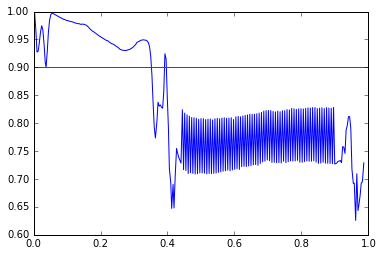

In [66]:
arr = np.arange(2840,3124)
plt.plot(phase[arr],stats['mean'][arr],'-')
plt.plot([0.,1.],[0.9,0.9],'r-')

In [52]:
for i in range(2840,3124):
    print stats['filename'][i], stats['mean'][i]

AllSkyImage000083286.FIT 0.997230464778
AllSkyImage000083287.FIT 0.966757330361
AllSkyImage000083288.FIT 0.927533524982
AllSkyImage000083289.FIT 0.928989210835
AllSkyImage000083290.FIT 0.944090863486
AllSkyImage000083291.FIT 0.96322160149
AllSkyImage000083292.FIT 0.974752475248
AllSkyImage000083293.FIT 0.966922146027
AllSkyImage000083294.FIT 0.940430438125
AllSkyImage000083295.FIT 0.908389954119
AllSkyImage000083296.FIT 0.900070140024
AllSkyImage000083297.FIT 0.927893302431
AllSkyImage000083298.FIT 0.963131026659
AllSkyImage000083299.FIT 0.984375
AllSkyImage000083300.FIT 0.994035785288
AllSkyImage000083301.FIT 0.997273718648
AllSkyImage000083302.FIT 0.996569467146
AllSkyImage000083303.FIT 0.99537037037
AllSkyImage000083304.FIT 0.994129158513
AllSkyImage000083305.FIT 0.992857142857
AllSkyImage000083306.FIT 0.991761723701
AllSkyImage000083307.FIT 0.990351872872
AllSkyImage000083308.FIT 0.989516129032
AllSkyImage000083309.FIT 0.988487883154
AllSkyImage000083310.FIT 0.987484728378
AllSkyIm

In [72]:
a = np.load(os.path.expanduser('~/foo.npy'))
print a

[ (57752.2527324537, 0.9357853541860468, 0.0, 4.4334412088382384, 'AllSkyImage000083358.FIT')
 (57752.05124335648, 0.9940357852882704, 0.0, 0.1107050899277397, 'AllSkyImage000083300.FIT')]


3127 3414


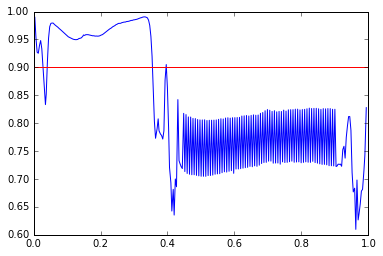

In [65]:
istart = 2840
for i in range(istart,len(phase)):
    if phase[i+1] < phase[i]:
        istart = i+1
        break
iend = istart

for i in range(iend,len(phase)):
    if phase[i+1] < phase[i]:
        iend = i
        break
print istart, iend
arr = np.arange(istart,iend)
plt.plot(phase[arr],stats['mean'][arr],'-')
plt.plot([0.,1.],[0.9,0.9],'r-')


4517 4660


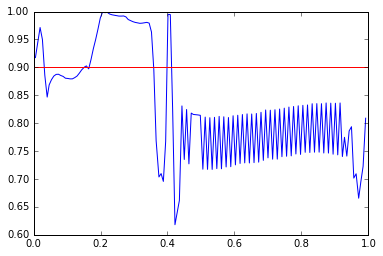

In [70]:
istart = iend+1
for i in range(istart,len(phase)):
    if phase[i+1] < phase[i]:
        istart = i+1
        break
iend = istart

for i in range(iend,len(phase)):
    if phase[i+1] < phase[i]:
        iend = i
        break
print istart, iend
arr = np.arange(istart,iend)
plt.plot(phase[arr],stats['mean'][arr],'-')
plt.plot([0.,1.],[0.9,0.9],'r-')



In [71]:
for i in range(istart,iend):
    print stats['filename'][i], stats['mean'][i]

AllSkyImage000084963.FIT 0.91759955738
AllSkyImage000084964.FIT 0.944691918991
AllSkyImage000084965.FIT 0.971502590674
AllSkyImage000084966.FIT 0.95
AllSkyImage000084967.FIT 0.886163024453
AllSkyImage000084968.FIT 0.846819415115
AllSkyImage000084969.FIT 0.868668596237
AllSkyImage000084970.FIT 0.877998444393
AllSkyImage000084971.FIT 0.884476534296
AllSkyImage000084972.FIT 0.887457331004
AllSkyImage000084973.FIT 0.887729549249
AllSkyImage000084974.FIT 0.885485958233
AllSkyImage000084975.FIT 0.883861774136
AllSkyImage000084976.FIT 0.880610687023
AllSkyImage000084977.FIT 0.880173078595
AllSkyImage000084978.FIT 0.879438842613
AllSkyImage000084979.FIT 0.879475452727
AllSkyImage000084980.FIT 0.881679389313
AllSkyImage000084981.FIT 0.884514453498
AllSkyImage000084982.FIT 0.889814221611
AllSkyImage000084983.FIT 0.895686422606
AllSkyImage000084984.FIT 0.900706273369
AllSkyImage000084985.FIT 0.902652944276
AllSkyImage000084986.FIT 0.897384305835
AllSkyImage000084987.FIT 0.91412984733
AllSkyImage0